In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
def threshold_image(img):
    img = np.float32(img)
    [thresh, img] = cv2.threshold(img, 0, 6, cv2.THRESH_BINARY)
    return img

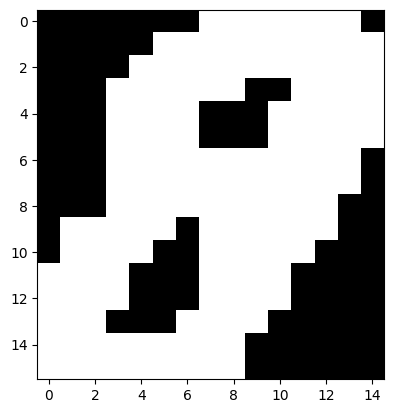

In [14]:
raw_data = []
with open('./ProjectDigits_materials/mfeat-pix.txt', 'r') as f:
    for line in f:
        pixels = []
        for c in line:
            if c.isdigit():
                pixels.append(int(c))
        raw_data.append(pixels)
raw_data = np.array(raw_data)

test_img = raw_data[1750].reshape(16, 15)

img = threshold_image(test_img)

fig = plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=6)

In [15]:
def count_circles(img):
    img = threshold_image(img)
    img = cv2.convertScaleAbs(img)
    
    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = contours[1] if len(contours) == 2 else contours[2]
    contours = contours[0] if len(contours) == 2 else contours[1]
    
    hierarchy = hierarchy[0]
    
    count = 0
    result = img.copy()
    result = cv2.merge([result, result, result])
    
    for component in zip(contours, hierarchy):
        contour_component = component[0]
        hierarchy_component = component[1]
    
        if (hierarchy_component[3] > -1) & (hierarchy_component[2] < 0):
            count += 1
            cv2.drawContours(result, [contour_component], 0, (0, 0, 255), 2)
    
    return count

In [19]:
def get_circle_data(data):
    counter = 0
    circle_counts = []
    
    for digit in data:
        img = digit.reshape(16, 15)
        circle_count = count_circles(img)
        circle_counts.append(circle_count)
        #print("Circles in digit ", counter, ": ", circle_count)
        counter += 1

    circle_counts = np.array(circle_counts)
    return circle_counts

In [20]:
circle_data = get_circle_data(raw_data)

[1 1 1 ... 1 1 1]
